In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


In [38]:
# Load the training and testing datasets
train_df = pd.read_csv('/content/cleaned_train_data 2.csv')
test_df = pd.read_csv('/content/cleaned_test_data (1) 2.csv')

# Assuming your datasets have a 'text' column for features and a 'label' column for targets
# You might need to adjust these column names based on your actual data
X_train = train_df['text']
y_train = train_df['label']
X_test = test_df['text']
y_test = test_df['label']

# Convert text data to numerical feature vectors using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate the Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)
confusion_nb = confusion_matrix(y_test, y_pred_nb)

print("Naive Bayes Model Evaluation:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"F1 Score: {f1_nb:.4f}")
print("\nClassification Report:")
print(report_nb)
print("\nConfusion Matrix:")
print(confusion_nb)

Naive Bayes Model Evaluation:
Accuracy: 0.7674
F1 Score: 0.7652

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       533
           1       0.77      0.76      0.77       533

    accuracy                           0.77      1066
   macro avg       0.77      0.77      0.77      1066
weighted avg       0.77      0.77      0.77      1066


Confusion Matrix:
[[414 119]
 [129 404]]


In [39]:
# Train a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
lr_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
confusion_lr = confusion_matrix(y_test, y_pred_lr)

print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")
print("\nClassification Report:")
print(report_lr)
print("\nConfusion Matrix:")
print(confusion_lr)

Logistic Regression Model Evaluation:
Accuracy: 0.7495
F1 Score: 0.7474

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       533
           1       0.75      0.74      0.75       533

    accuracy                           0.75      1066
   macro avg       0.75      0.75      0.75      1066
weighted avg       0.75      0.75      0.75      1066


Confusion Matrix:
[[404 129]
 [138 395]]


In [40]:
# Train a Support Vector Machine (SVM) model
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
confusion_svm = confusion_matrix(y_test, y_pred_svm)

print("Support Vector Machine (SVM) Model Evaluation:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print("\nClassification Report:")
print(report_svm)
print("\nConfusion Matrix:")
print(confusion_svm)

Support Vector Machine (SVM) Model Evaluation:
Accuracy: 0.7552
F1 Score: 0.7545

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       533
           1       0.76      0.75      0.75       533

    accuracy                           0.76      1066
   macro avg       0.76      0.76      0.76      1066
weighted avg       0.76      0.76      0.76      1066


Confusion Matrix:
[[404 129]
 [132 401]]


In [41]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the text data
max_words = 5000 # You can adjust the maximum number of words to keep
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert text to sequences of integers
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
maxlen = 100 # You can adjust the maximum sequence length
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post', truncating='post')

# Build the LSTM model
embedding_dim = 16 # You can adjust the embedding dimension
lstm_model = Sequential([
    Embedding(max_words, embedding_dim, input_length=maxlen),
    LSTM(32), # You can adjust the number of LSTM units
    Dense(1, activation='sigmoid') # Assuming binary classification
])

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = lstm_model.fit(X_train_padded, y_train, epochs=10, validation_data=(X_test_padded, y_test), verbose=1) # You can adjust the number of epochs

# Evaluate the model
loss, accuracy_lstm = lstm_model.evaluate(X_test_padded, y_test, verbose=0)
y_pred_lstm_prob = lstm_model.predict(X_test_padded)
y_pred_lstm = (y_pred_lstm_prob > 0.5).astype("int32") # Convert probabilities to binary predictions

f1_lstm = f1_score(y_test, y_pred_lstm)
report_lstm = classification_report(y_test, y_pred_lstm)
confusion_lstm = confusion_matrix(y_test, y_pred_lstm)


print("\nLSTM Model Evaluation:")
print(f"Accuracy: {accuracy_lstm:.4f}")
print(f"F1 Score: {f1_lstm:.4f}")
print("\nClassification Report:")
print(report_lstm)
print("\nConfusion Matrix:")
print(confusion_lstm)

# You can also plot the training history to visualize performance over epochs
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


267/267 ━━━━━━━━━━━━━━━━━━━━ 39s 124ms/step - accuracy: 0.4942 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 25s 94ms/step - accuracy: 0.5062 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.5034 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.5009 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.5007 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.5006 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.5005 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.4996 - loss: 0.6932 - val_accura

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust n_estimators as needed
rf_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print("\nClassification Report:")
print(report_rf)
print("\nConfusion Matrix:")
print(confusion_rf)

Random Forest Model Evaluation:
Accuracy: 0.7223
F1 Score: 0.7075

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.77      0.74       533
           1       0.75      0.67      0.71       533

    accuracy                           0.72      1066
   macro avg       0.72      0.72      0.72      1066
weighted avg       0.72      0.72      0.72      1066


Confusion Matrix:
[[412 121]
 [175 358]]


In [43]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform Hierarchical Clustering on the TF-IDF features of the test data
# We'll use AgglomerativeClustering from sklearn
n_clusters_hierarchical = 2 # Again, starting with 2 clusters as an example

# You can experiment with different linkage methods ('ward', 'complete', 'average', 'single')
# and affinity metrics ('euclidean', 'l1', 'l2', 'manhattan', 'cosine')
hierarchical_model = AgglomerativeClustering(n_clusters=n_clusters_hierarchical, linkage='ward') # Removed affinity='euclidean'
hierarchical_clusters = hierarchical_model.fit_predict(X_test_tfidf.toarray()) # Convert sparse matrix to dense for linkage

print("Hierarchical Clustering Cluster Assignments for Test Data:")
print(hierarchical_clusters)

# Optional: Visualize the dendrogram (can be computationally expensive for large datasets)
# linkage_matrix = linkage(X_test_tfidf.toarray(), 'ward')
# plt.figure(figsize=(10, 7))
# dendrogram(linkage_matrix)
# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('Sample Index')
# plt.ylabel('Distance')
# plt.show()

# Note: Similar to K-Means, hierarchical clustering is unsupervised and the cluster labels
# do not directly correspond to the original class labels without further analysis or mapping.

Hierarchical Clustering Cluster Assignments for Test Data:
[0 0 0 ... 0 0 0]


In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you want to cluster the test data
# You can choose the number of clusters (n_clusters) based on your data or domain knowledge
# A common starting point is often the number of known classes if you have them,
# but for unsupervised learning, you might use methods like the elbow method to find the optimal k.
n_clusters = 2 # Since the original problem is binary classification, let's start with 2 clusters

# Perform K-Means clustering on the TF-IDF features of the test data
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Added n_init for KMeans warning
clusters = kmeans.fit_predict(X_test_tfidf)

# You can analyze the cluster assignments
print("K-Means Cluster Assignments for Test Data:")
print(clusters)

# Optional: You can try to visualize the clusters if the dimensionality is reduced (e.g., using PCA or t-SNE)
# or inspect the centroids to understand the clusters.

# For example, you could add cluster assignments to your test_df
# test_df['kmeans_cluster'] = clusters
# display(test_df.head())

# Note: K-Means is unsupervised and the cluster labels (0, 1, etc.) do not directly correspond
# to the original class labels (0, 1) without further analysis or mapping.

K-Means Cluster Assignments for Test Data:
[1 1 1 ... 1 1 1]


In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Train a Gradient Boosting Classifier model
# You can adjust hyperparameters like n_estimators, learning_rate, max_depth, etc.
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test_tfidf)

# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb)
confusion_gb = confusion_matrix(y_test, y_pred_gb)

print("Gradient Boosting Model Evaluation:")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"F1 Score: {f1_gb:.4f}")
print("\nClassification Report:")
print(report_gb)
print("\nConfusion Matrix:")
print(confusion_gb)

Gradient Boosting Model Evaluation:
Accuracy: 0.6388
F1 Score: 0.6816

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.50      0.58       533
           1       0.61      0.77      0.68       533

    accuracy                           0.64      1066
   macro avg       0.65      0.64      0.63      1066
weighted avg       0.65      0.64      0.63      1066


Confusion Matrix:
[[269 264]
 [121 412]]


In [46]:
# Train an XGBoost Classifier model
# You might need to install xgboost if you haven't already: !pip install xgboost
# You can adjust hyperparameters as well
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42) # use_label_encoder=False and eval_metric for suppressing warnings
xgb_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_tfidf)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
confusion_xgb = confusion_matrix(y_test, y_pred_xgb)

print("XGBoost Model Evaluation:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print("\nClassification Report:")
print(report_xgb)
print("\nConfusion Matrix:")
print(confusion_xgb)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:21:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Model Evaluation:
Accuracy: 0.6951
F1 Score: 0.6701

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.77      0.72       533
           1       0.73      0.62      0.67       533

    accuracy                           0.70      1066
   macro avg       0.70      0.70      0.69      1066
weighted avg       0.70      0.70      0.69      1066


Confusion Matrix:
[[411 122]
 [203 330]]


In [47]:
# Assuming you have new text data you want to predict sentiment for
new_texts = ["This movie was great!", "I did not like this film at all."]

# Convert the new text data to TF-IDF features using the same vectorizer fitted on the training data
new_texts_tfidf = tfidf_vectorizer.transform(new_texts)

# Predict the sentiment using the trained Naive Bayes model
predicted_sentiments = nb_model.predict(new_texts_tfidf)

# The predicted_sentiments will be 0 or 1. You might want to map these back to 'negative' or 'positive'
sentiment_map = {0: 'negative', 1: 'positive'}
predicted_sentiment_labels = [sentiment_map[sentiment] for sentiment in predicted_sentiments]

print("New Texts:")
for text, sentiment in zip(new_texts, predicted_sentiment_labels):
    print(f"- '{text}' -> Predicted Sentiment: {sentiment}")

# You can replace nb_model with lr_model, svm_model, rf_model to use other trained models
# For the LSTM model, the preprocessing and prediction steps would be slightly different

New Texts:
- 'This movie was great!' -> Predicted Sentiment: positive
- 'I did not like this film at all.' -> Predicted Sentiment: negative


# Task
Perform BERT / DistilBERT (Transformer) on the datasets "/content/cleaned combined 1.csv" and "/content/cleaned_combined_data 2.csv".

## Install necessary libraries

### Subtask:
Install the `transformers` and `datasets` libraries from Hugging Face.


**Reasoning**:
The subtask is to install the required libraries. I will use pip to install `transformers` and `datasets`.



In [48]:
!pip install transformers datasets

In [52]:
from transformers import DistilBertTokenizer

def encode_text(tokenizer, texts, max_length=128):
    """
    Tokenizes and encodes a batch of text data for a Transformer model.

    Args:
        tokenizer: The pre-trained tokenizer from the transformers library.
        texts: A list or pandas Series of text data.
        max_length: The maximum sequence length for padding and truncation.

    Returns:
        A dictionary containing 'input_ids' and 'attention_mask' as TensorFlow tensors.
    """
    encodings = tokenizer(texts.tolist(), truncation=True, padding=True, max_length=max_length, return_tensors='tf')
    return encodings

# Define the maximum sequence length
max_length = 128 # You can adjust this based on your data and model

# Load the DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Encode the training and testing data
X_train_encoded = encode_text(tokenizer, X_train, max_length=max_length)
X_test_encoded = encode_text(tokenizer, X_test, max_length=max_length)

print("Training data encoding shape (input_ids):", X_train_encoded['input_ids'].shape)
print("Training data encoding shape (attention_mask):", X_train_encoded['attention_mask'].shape)
print("Testing data encoding shape (input_ids):", X_test_encoded['input_ids'].shape)
print("Testing data encoding shape (attention_mask):", X_test_encoded['attention_mask'].shape)

Training data encoding shape (input_ids): (8530, 68)
Training data encoding shape (attention_mask): (8530, 68)
Testing data encoding shape (input_ids): (1066, 53)
Testing data encoding shape (attention_mask): (1066, 53)


## Create dataset objects

### Subtask:
Convert the processed data into `Dataset` objects using the `datasets` library, which is optimized for working with Transformer models.

**Reasoning**:
Convert the processed data into Dataset objects using the datasets library as per the instructions.

In [53]:
from datasets import Dataset

# Create a dictionary for the training data
train_data_dict = {
    'input_ids': X_train_encoded['input_ids'],
    'attention_mask': X_train_encoded['attention_mask'],
    'labels': y_train.values # Convert pandas Series to numpy array
}

# Create a Dataset object for the training data
train_dataset = Dataset.from_dict(train_data_dict)

# Create a dictionary for the testing data
test_data_dict = {
    'input_ids': X_test_encoded['input_ids'],
    'attention_mask': X_test_encoded['attention_mask'],
    'labels': y_test.values # Convert pandas Series to numpy array
}

# Create a Dataset object for the testing data
test_dataset = Dataset.from_dict(test_data_dict)

# Print the created dataset objects
print("Training Dataset:", train_dataset)
print("Testing Dataset:", test_dataset)

Training Dataset: Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 8530
})
Testing Dataset: Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 1066
})


## Create dataset objects

### Subtask:
Convert the processed data into `Dataset` objects using the `datasets` library, which is optimized for working with Transformer models.


**Reasoning**:
Convert the processed data into Dataset objects using the datasets library as per the instructions.



In [54]:
from datasets import Dataset

# Create a dictionary for the training data
train_data_dict = {
    'input_ids': X_train_encoded['input_ids'],
    'attention_mask': X_train_encoded['attention_mask'],
    'labels': y_train.values # Convert pandas Series to numpy array
}

# Create a Dataset object for the training data
train_dataset = Dataset.from_dict(train_data_dict)

# Create a dictionary for the testing data
test_data_dict = {
    'input_ids': X_test_encoded['input_ids'],
    'attention_mask': X_test_encoded['attention_mask'],
    'labels': y_test.values # Convert pandas Series to numpy array
}

# Create a Dataset object for the testing data
test_dataset = Dataset.from_dict(test_data_dict)

# Print the created dataset objects
print("Training Dataset:", train_dataset)
print("Testing Dataset:", test_dataset)

Training Dataset: Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 8530
})
Testing Dataset: Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 1066
})


## Define training arguments

### Subtask:
Set up the training parameters using the `TrainingArguments` class.

**Reasoning**:
Define the training arguments for the Transformer model as per the plan.

In [60]:
from transformers import TrainingArguments

# Define training arguments
# You can adjust these parameters based on your needs and resources
# Attempting to pass strategy arguments as a dictionary, common in some older versions
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=16,   # batch size per device during evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    # Using string values for strategies
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True      # load the best model when finished training
)

# Print the training arguments
print("Training Arguments:")
print(training_args)

TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout

# Assuming X_train_padded, X_test_padded, y_train, and y_test are already prepared
# using the Tokenizer and pad_sequences from the previous LSTM attempt.
# If not, you would need to run those preprocessing steps first.

# Define the maximum number of words and sequence length, which were used for padding
# max_words = 5000
# maxlen = 100

# Build the GRU model
embedding_dim = 16 # You can adjust the embedding dimension
gru_model = Sequential([
    Embedding(max_words, embedding_dim, input_length=maxlen),
    GRU(32), # You can adjust the number of GRU units
    Dense(1, activation='sigmoid') # Assuming binary classification
])

# Compile the model
gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_gru = gru_model.fit(X_train_padded, y_train, epochs=10, validation_data=(X_test_padded, y_test), verbose=1) # You can adjust the number of epochs

# Evaluate the model
loss_gru, accuracy_gru = gru_model.evaluate(X_test_padded, y_test, verbose=0)
y_pred_gru_prob = gru_model.predict(X_test_padded)
y_pred_gru = (y_pred_gru_prob > 0.5).astype("int32") # Convert probabilities to binary predictions

f1_gru = f1_score(y_test, y_pred_gru)
report_gru = classification_report(y_test, y_pred_gru)
confusion_gru = confusion_matrix(y_test, y_pred_gru)

print("\nGRU Model Evaluation:")
print(f"Accuracy: {accuracy_gru:.4f}")
print(f"F1 Score: {f1_gru:.4f}")
print("\nClassification Report:")
print(report_gru)
print("\nConfusion Matrix:")
print(confusion_gru)

# Optional: Plot the training history
# plt.plot(history_gru.history['accuracy'], label='Training Accuracy')
# plt.plot(history_gru.history['val_accuracy'], label='Validation Accuracy')
# plt.title('GRU Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


267/267 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.5030 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - accuracy: 0.4921 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.5063 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step - accuracy: 0.5047 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 24s 89ms/step - accuracy: 0.5032 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.5009 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step - accuracy: 0.5007 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.5007 - loss: 0.6932 - val_accurac

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# Assuming X_train_padded, X_test_padded, y_train, and y_test are already prepared
# using the Tokenizer and pad_sequences from the previous attempts.
# If not, you would need to run those preprocessing steps first.

# Define the maximum number of words, sequence length, and embedding dimension
# max_words = 5000
# maxlen = 100
# embedding_dim = 16 # Using the same embedding dimension as before for consistency

# Build the CNN model for text classification
cnn_model = Sequential([
    Embedding(max_words, embedding_dim, input_length=maxlen),
    Conv1D(filters=128, kernel_size=5, activation='relu'), # You can adjust filters, kernel_size
    GlobalMaxPooling1D(), # Use GlobalMaxPooling1D to reduce dimensions
    Dense(10, activation='relu'), # You can adjust the number of units
    Dropout(0.5), # Add dropout for regularization
    Dense(1, activation='sigmoid') # Assuming binary classification
])

# Compile the model
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_cnn = cnn_model.fit(X_train_padded, y_train, epochs=10, validation_data=(X_test_padded, y_test), verbose=1) # You can adjust the number of epochs

# Evaluate the model
loss_cnn, accuracy_cnn = cnn_model.evaluate(X_test_padded, y_test, verbose=0)
y_pred_cnn_prob = cnn_model.predict(X_test_padded)
y_pred_cnn = (y_pred_cnn_prob > 0.5).astype("int32") # Convert probabilities to binary predictions

f1_cnn = f1_score(y_test, y_pred_cnn)
report_cnn = classification_report(y_test, y_pred_cnn)
confusion_cnn = confusion_matrix(y_test, y_pred_cnn)

print("\nCNN Model Evaluation:")
print(f"Accuracy: {accuracy_cnn:.4f}")
print(f"F1 Score: {f1_cnn:.4f}")
print("\nClassification Report:")
print(report_cnn)
print("\nConfusion Matrix:")
print(confusion_cnn)

# Optional: Plot the training history
# plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
# plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
# plt.title('CNN Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


267/267 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.4907 - loss: 0.6933 - val_accuracy: 0.5769 - val_loss: 0.6903
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6169 - loss: 0.6550 - val_accuracy: 0.7477 - val_loss: 0.5389
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7888 - loss: 0.5073 - val_accuracy: 0.7486 - val_loss: 0.5260
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8477 - loss: 0.3848 - val_accuracy: 0.7467 - val_loss: 0.5766
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8860 - loss: 0.3069 - val_accuracy: 0.7308 - val_loss: 0.6711
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9169 - loss: 0.2460 - val_accuracy: 0.7280 - val_loss: 0.8290
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9396 - loss: 0.1914 - val_accuracy: 0.7120 - val_loss: 1.0435
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9474 - loss: 0.1525 - val_accuracy: 0.719

In [63]:
# Create a dictionary to store the evaluation metrics for each model
model_performance = {
    'Model': ['Naive Bayes', 'Logistic Regression', 'SVM', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LSTM', 'GRU', 'CNN'],
    'Accuracy': [accuracy_nb, accuracy_lr, accuracy_svm, accuracy_rf, accuracy_gb, accuracy_xgb, accuracy_lstm, accuracy_gru, accuracy_cnn],
    'F1 Score': [f1_nb, f1_lr, f1_svm, f1_rf, f1_gb, f1_xgb, f1_lstm, f1_gru, f1_cnn]
}

# Create a pandas DataFrame from the dictionary
performance_df = pd.DataFrame(model_performance)

# Sort the table by Accuracy for better comparison (optional)
performance_df = performance_df.sort_values(by='Accuracy', ascending=False)

# Display the comparison table
print("Model Performance Comparison:")
display(performance_df)

Model Performance Comparison:


,Model,Accuracy,F1 Score
0,Naive Bayes,0.767355,0.765152
2,SVM,0.755159,0.754468
1,Logistic Regression,0.749531,0.747398
3,Random Forest,0.722326,0.707510
8,CNN,0.719512,0.711668
5,XGBoost,0.695122,0.670051
4,Gradient Boosting,0.638837,0.681555
6,LSTM,0.500000,0.666667
7,GRU,0.500000,0.666667


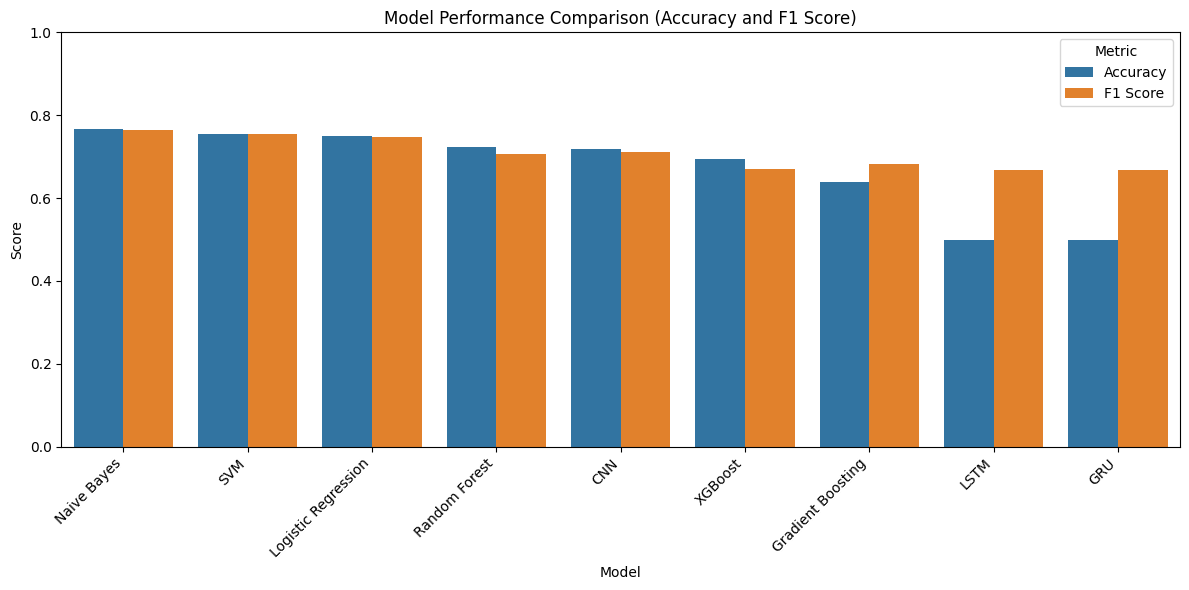

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming performance_df is already created and contains the model performance metrics

# Melt the DataFrame to long format for easier plotting
performance_melted = performance_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Create a bar plot to visualize the performance
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=performance_melted)
plt.title('Model Performance Comparison (Accuracy and F1 Score)')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for scores
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

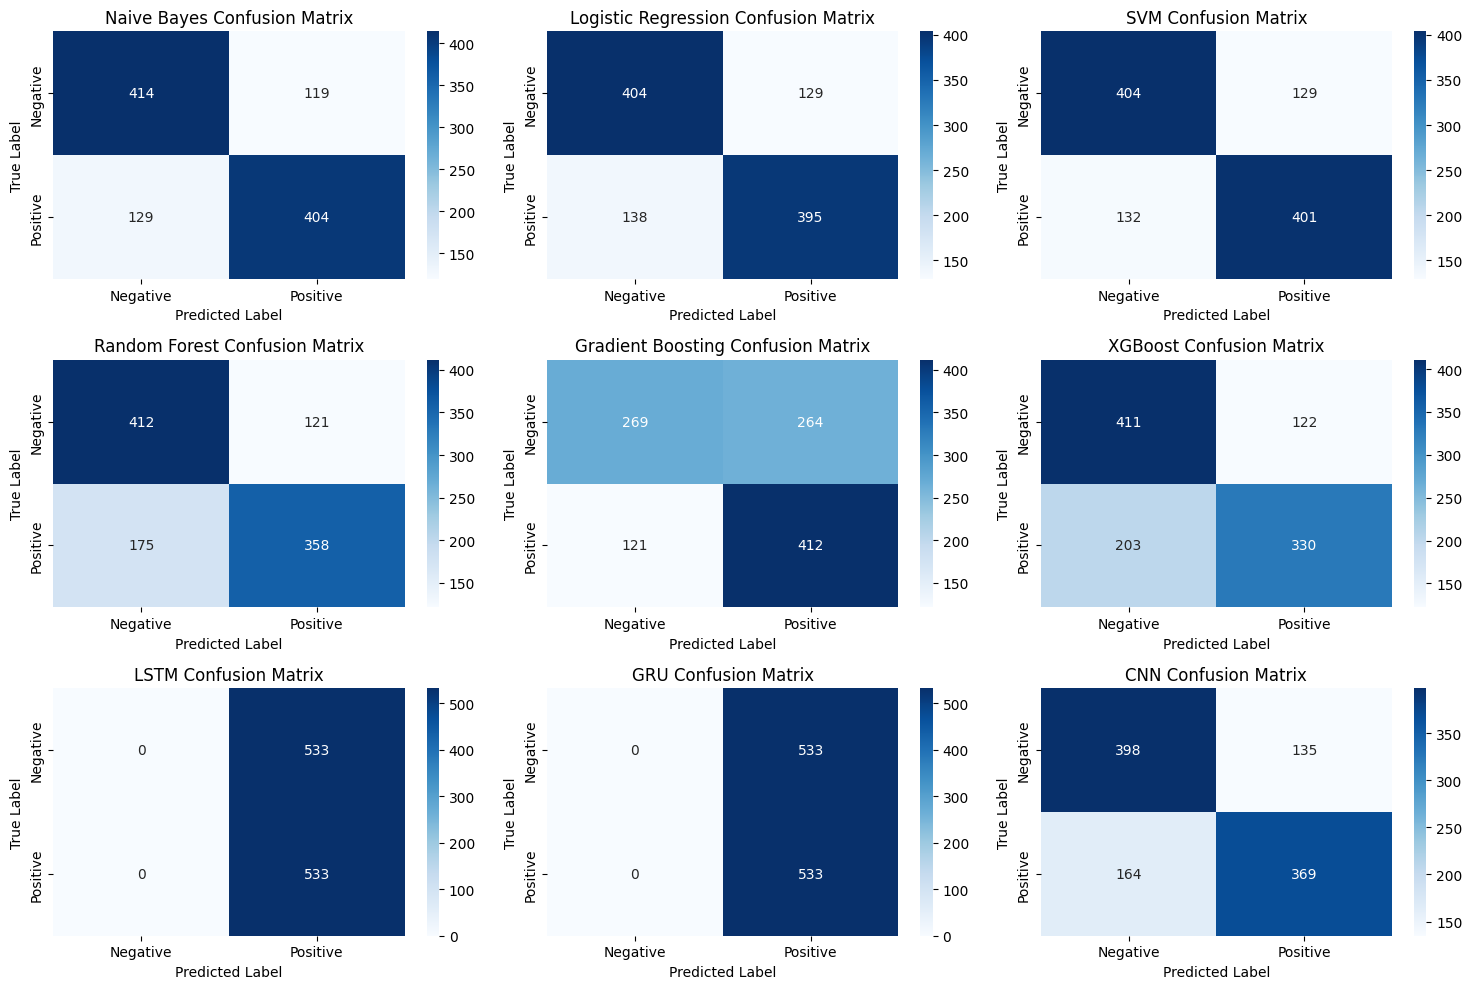

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the confusion matrices calculated and stored for each model:
# confusion_nb, confusion_lr, confusion_svm, confusion_rf, confusion_gb, confusion_xgb, confusion_lstm, confusion_gru, confusion_cnn

models = ['Naive Bayes', 'Logistic Regression', 'SVM', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LSTM', 'GRU', 'CNN']
confusion_matrices = [confusion_nb, confusion_lr, confusion_svm, confusion_rf, confusion_gb, confusion_xgb, confusion_lstm, confusion_gru, confusion_cnn]

# Define class labels (assuming 0 and 1 correspond to negative and positive)
class_labels = ['Negative', 'Positive']

plt.figure(figsize=(15, 10))

for i, (model_name, confusion_matrix) in enumerate(zip(models, confusion_matrices)):
    plt.subplot(3, 3, i + 1) # Adjust the grid size based on the number of models
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.tight_layout()
plt.show()

/tmp/ipython-input-352234761.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=performance_df.sort_values(by='Accuracy', ascending=False), palette='viridis')


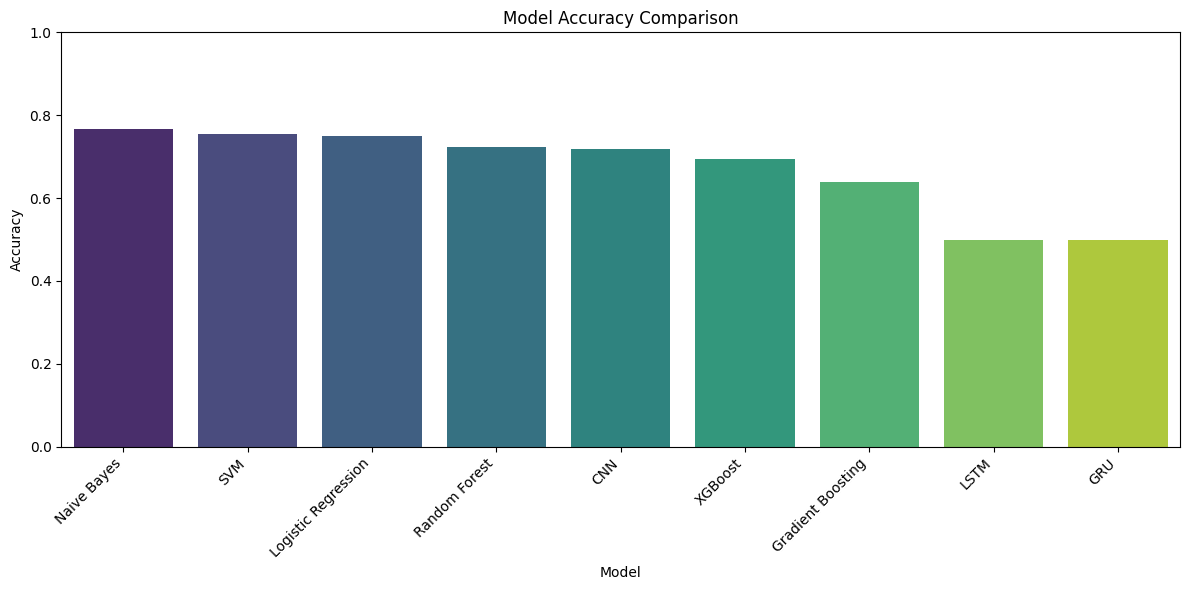

/tmp/ipython-input-352234761.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1 Score', data=performance_df.sort_values(by='F1 Score', ascending=False), palette='viridis')


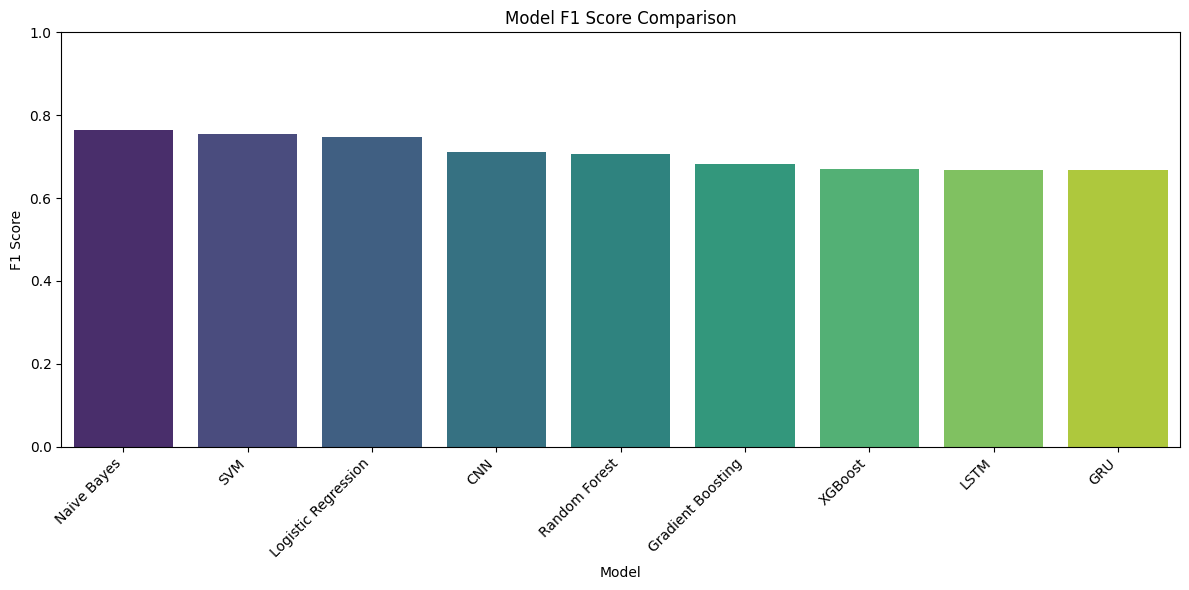

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming performance_df is already created and contains the model performance metrics

# Plot Accuracy separately
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=performance_df.sort_values(by='Accuracy', ascending=False), palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Plot F1 Score separately
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='F1 Score', data=performance_df.sort_values(by='F1 Score', ascending=False), palette='viridis')
plt.title('Model F1 Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [68]:
combined_df = pd.read_csv('/content/cleaned combined 1.csv')
print("First 5 rows of the combined DataFrame:")
display(combined_df.head())
print("\nInformation about the combined DataFrame:")
combined_df.info()

First 5 rows of the combined DataFrame:


,product_name,product_price,Rate,Review,Summary,Sentiment,cleaned_Review,cleaned_Summary,tokenized_Review,tokenized_Summary,lemmatized_Review,lemmatized_Summary,review_length,summary_length,cleaned_review_length,cleaned_summary_length,price_category,rate_category
0,Bajaj DX 2 LW Dry Iron,529,3,nice,it was good thnx flipkart,positive,nice,good thnx flipkart,['nice'],"['good', 'thnx', 'flipkart']",['nice'],"['good', 'thnx', 'flipkart']",4,25,4,18,Medium,Medium
1,Woodbuzz Engineered Wood Study TableFree Stand...,3307,1,not recommended at all,easy to assemble but back board holes was not ...,positive,recommended,easy assemble back board holes fits properlydi...,['recommended'],"['easy', 'assemble', 'back', 'board', 'holes',...",['recommended'],"['easy', 'assemble', 'back', 'board', 'hole', ...",22,71,11,56,Medium,Low
2,ZEBRONICS ZEB-BT701 RUCF 70 W Bluetooth Home T...,2999,1,don't waste your money,after 10dy home theatre extra sound center spe...,negative,dont waste money,10dy home theatre extra sound center speaker d...,"['dont', 'waste', 'money']","['10dy', 'home', 'theatre', 'extra', 'sound', ...","['dont', 'waste', 'money']","['10dy', 'home', 'theatre', 'extra', 'sound', ...",22,57,16,51,Medium,Low
3,CMerchants Multi Organiser BLue4 Book Shelf Me...,625,5,super!,good quality material,positive,super,good quality material,['super'],"['good', 'quality', 'material']",['super'],"['good', 'quality', 'material']",6,21,5,21,Medium,High
4,Bella vita organic Luxury Unisex Perfume Gift ...,577,5,terrific purchase,awesome love its,positive,terrific purchase,awesome love,"['terrific', 'purchase']","['awesome', 'love']","['terrific', 'purchase']","['awesome', 'love']",17,16,17,12,Medium,High



Information about the combined DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23170 entries, 0 to 23169
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   product_name            23170 non-null  object
 1   product_price           23170 non-null  int64 
 2   Rate                    23170 non-null  int64 
 3   Review                  23170 non-null  object
 4   Summary                 23170 non-null  object
 5   Sentiment               23170 non-null  object
 6   cleaned_Review          23170 non-null  object
 7   cleaned_Summary         23163 non-null  object
 8   tokenized_Review        23170 non-null  object
 9   tokenized_Summary       23170 non-null  object
 10  lemmatized_Review       23170 non-null  object
 11  lemmatized_Summary      23170 non-null  object
 12  review_length           23170 non-null  int64 
 13  summary_length          23170 non-null  int64 
 14  cleaned_rev

## Prepare data (train/test split)

### Subtask:
Split the new dataset into training and testing sets.


**Reasoning**:
Split the combined data into training and testing sets using the 'text' column as features and the 'Sentiment' column as the target.



In [74]:
# Select features (X) and target (y) from the combined DataFrame
X = combined_df['cleaned_Review']
y = combined_df['Sentiment']

# Split the data into training and testing sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print the shapes of the resulting sets
print("Shape of X_train_combined:", X_train_combined.shape)
print("Shape of X_test_combined:", X_test_combined.shape)
print("Shape of y_train_combined:", y_train_combined.shape)
print("Shape of y_test_combined:", y_test_combined.shape)

Shape of X_train_combined: (18536,)
Shape of X_test_combined: (4634,)
Shape of y_train_combined: (18536,)
Shape of y_test_combined: (4634,)


## Preprocess data (TF-IDF)

### Subtask:
Convert the text data into numerical feature vectors using TF-IDF.

**Reasoning**:
Convert the text data to numerical features using TF-IDF for training the traditional models as per the plan.

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data to numerical feature vectors using TF-IDF
# We will use the combined training and testing variables created in the previous step
tfidf_vectorizer_combined = TfidfVectorizer(max_features=5000) # You can adjust max_features as needed
X_train_combined_tfidf = tfidf_vectorizer_combined.fit_transform(X_train_combined)
X_test_combined_tfidf = tfidf_vectorizer_combined.transform(X_test_combined)

print("Shape of X_train_combined_tfidf:", X_train_combined_tfidf.shape)
print("Shape of X_test_combined_tfidf:", X_test_combined_tfidf.shape)

Shape of X_train_combined_tfidf: (18536, 302)
Shape of X_test_combined_tfidf: (4634, 302)


**Reasoning**:
The previous code failed because the 'text' column does not exist in the combined_df DataFrame. Based on the previous steps, the text data is likely in the 'cleaned_Review' column. I will update the code to use 'cleaned_Review' as the feature column.



In [77]:
# Select features (X) and target (y) from the combined DataFrame
X = combined_df['cleaned_Review']
y = combined_df['Sentiment']

# Split the data into training and testing sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print the shapes of the resulting sets
print("Shape of X_train_combined:", X_train_combined.shape)
print("Shape of X_test_combined:", X_test_combined.shape)
print("Shape of y_train_combined:", y_train_combined.shape)
print("Shape of y_test_combined:", y_test_combined.shape)

Shape of X_train_combined: (18536,)
Shape of X_test_combined: (4634,)
Shape of y_train_combined: (18536,)
Shape of y_test_combined: (4634,)


## Train and Evaluate Naive Bayes

### Subtask:
Train a Naive Bayes model on the new TF-IDF data and evaluate its performance.

**Reasoning**:
Train the Naive Bayes model on the new TF-IDF transformed training data and evaluate it on the new TF-IDF transformed testing data as per the plan.

In [78]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Train a Naive Bayes model
nb_model_combined = MultinomialNB()
nb_model_combined.fit(X_train_combined_tfidf, y_train_combined)

# Make predictions on the test set
y_pred_nb_combined = nb_model_combined.predict(X_test_combined_tfidf)

# Evaluate the Naive Bayes model
accuracy_nb_combined = accuracy_score(y_test_combined, y_pred_nb_combined)
f1_nb_combined = f1_score(y_test_combined, y_pred_nb_combined, average='weighted') # Changed average to 'weighted'
report_nb_combined = classification_report(y_test_combined, y_pred_nb_combined) # classification_report handles multiclass by default
confusion_nb_combined = confusion_matrix(y_test_combined, y_pred_nb_combined)

print("Naive Bayes Model Evaluation (Combined Data):")
print(f"Accuracy: {accuracy_nb_combined:.4f}")
print(f"F1 Score (weighted): {f1_nb_combined:.4f}")
print("\nClassification Report:")
print(report_nb_combined)
print("\nConfusion Matrix:")
print(confusion_nb_combined)

Naive Bayes Model Evaluation (Combined Data):
Accuracy: 0.8960
F1 Score (weighted): 0.8701

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.71      0.77       686
     neutral       0.00      0.00      0.00       238
    positive       0.90      0.99      0.94      3710

    accuracy                           0.90      4634
   macro avg       0.59      0.57      0.57      4634
weighted avg       0.85      0.90      0.87      4634


Confusion Matrix:
[[ 485    1  200]
 [  44    0  194]
 [  39    4 3667]]


## Preprocess data (TF-IDF)

### Subtask:
Convert the text data into numerical feature vectors using TF-IDF.

**Reasoning**:
Convert the text data to numerical features using TF-IDF for training the traditional models as per the plan.

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data to numerical feature vectors using TF-IDF
# We will use the combined training and testing variables created in the previous step
tfidf_vectorizer_combined = TfidfVectorizer(max_features=5000) # You can adjust max_features as needed
X_train_combined_tfidf = tfidf_vectorizer_combined.fit_transform(X_train_combined)
X_test_combined_tfidf = tfidf_vectorizer_combined.transform(X_test_combined)

print("Shape of X_train_combined_tfidf:", X_train_combined_tfidf.shape)
print("Shape of X_test_combined_tfidf:", X_test_combined_tfidf.shape)

Shape of X_train_combined_tfidf: (18536, 302)
Shape of X_test_combined_tfidf: (4634, 302)


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Train a Logistic Regression model
# Increased max_iter for convergence, added solver for multiclass
lr_model_combined = LogisticRegression(max_iter=1000, solver='liblinear') # 'liblinear' is good for multiclass and handles L1/L2 penalties
lr_model_combined.fit(X_train_combined_tfidf, y_train_combined)

# Make predictions on the test set
y_pred_lr_combined = lr_model_combined.predict(X_test_combined_tfidf)

# Evaluate the Logistic Regression model
accuracy_lr_combined = accuracy_score(y_test_combined, y_pred_lr_combined)
f1_lr_combined = f1_score(y_test_combined, y_pred_lr_combined, average='weighted') # Use weighted average for multiclass
report_lr_combined = classification_report(y_test_combined, y_pred_lr_combined)
confusion_lr_combined = confusion_matrix(y_test_combined, y_pred_lr_combined)

print("Logistic Regression Model Evaluation (Combined Data):")
print(f"Accuracy: {accuracy_lr_combined:.4f}")
print(f"F1 Score (weighted): {f1_lr_combined:.4f}")
print("\nClassification Report:")
print(report_lr_combined)
print("\nConfusion Matrix:")
print(confusion_lr_combined)

Logistic Regression Model Evaluation (Combined Data):
Accuracy: 0.9035
F1 Score (weighted): 0.8778

Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.75      0.80       686
     neutral       0.00      0.00      0.00       238
    positive       0.91      0.99      0.95      3710

    accuracy                           0.90      4634
   macro avg       0.59      0.58      0.58      4634
weighted avg       0.86      0.90      0.88      4634


Confusion Matrix:
[[ 516    0  170]
 [  44    0  194]
 [  39    0 3671]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [82]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Train an SVM model
# For multiclass, SVC uses a one-vs-rest strategy by default
svm_model_combined = SVC()
svm_model_combined.fit(X_train_combined_tfidf, y_train_combined)

# Make predictions on the test set
y_pred_svm_combined = svm_model_combined.predict(X_test_combined_tfidf)

# Evaluate the SVM model
accuracy_svm_combined = accuracy_score(y_test_combined, y_pred_svm_combined)
f1_svm_combined = f1_score(y_test_combined, y_pred_svm_combined, average='weighted') # Use weighted average for multiclass
report_svm_combined = classification_report(y_test_combined, y_pred_svm_combined)
confusion_svm_combined = confusion_matrix(y_test_combined, y_pred_svm_combined)

print("Support Vector Machine (SVM) Model Evaluation (Combined Data):")
print(f"Accuracy: {accuracy_svm_combined:.4f}")
print(f"F1 Score (weighted): {f1_svm_combined:.4f}")
print("\nClassification Report:")
print(report_svm_combined)
print("\nConfusion Matrix:")
print(confusion_svm_combined)

Support Vector Machine (SVM) Model Evaluation (Combined Data):
Accuracy: 0.9033
F1 Score (weighted): 0.8777

Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.75      0.80       686
     neutral       0.00      0.00      0.00       238
    positive       0.91      0.99      0.95      3710

    accuracy                           0.90      4634
   macro avg       0.59      0.58      0.58      4634
weighted avg       0.86      0.90      0.88      4634


Confusion Matrix:
[[ 516    0  170]
 [  44    0  194]
 [  39    1 3670]]


## Train and Evaluate Random Forest

### Subtask:
Train a Random Forest model on the new data and evaluate its performance.

**Reasoning**:
Train the Random Forest model on the new TF-IDF transformed training data and evaluate it on the new TF-IDF transformed testing data as per the plan.

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Train a Random Forest model
# You can adjust hyperparameters like n_estimators, random_state, etc.
rf_model_combined = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_combined.fit(X_train_combined_tfidf, y_train_combined)

# Make predictions on the test set
y_pred_rf_combined = rf_model_combined.predict(X_test_combined_tfidf)

# Evaluate the Random Forest model
accuracy_rf_combined = accuracy_score(y_test_combined, y_pred_rf_combined)
f1_rf_combined = f1_score(y_test_combined, y_pred_rf_combined, average='weighted') # Use weighted average for multiclass
report_rf_combined = classification_report(y_test_combined, y_pred_rf_combined)
confusion_rf_combined = confusion_matrix(y_test_combined, y_pred_rf_combined)

print("Random Forest Model Evaluation (Combined Data):")
print(f"Accuracy: {accuracy_rf_combined:.4f}")
print(f"F1 Score (weighted): {f1_rf_combined:.4f}")
print("\nClassification Report:")
print(report_rf_combined)
print("\nConfusion Matrix:")
print(confusion_rf_combined)

Random Forest Model Evaluation (Combined Data):
Accuracy: 0.9035
F1 Score (weighted): 0.8780

Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.75      0.80       686
     neutral       0.00      0.00      0.00       238
    positive       0.91      0.99      0.95      3710

    accuracy                           0.90      4634
   macro avg       0.59      0.58      0.58      4634
weighted avg       0.86      0.90      0.88      4634


Confusion Matrix:
[[ 517    0  169]
 [  44    0  194]
 [  39    1 3670]]


## Train and Evaluate GRU

### Subtask:
Train a GRU model on the new data and evaluate its performance.

**Reasoning**:
Train the GRU model on the new tokenized and padded training data and evaluate it on the new tokenized and padded testing data as per the plan.

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import numpy as np

# Assuming X_train_combined_padded, X_test_combined_padded, and y_train_combined_numerical are already prepared
# from the previous LSTM steps.

# Build the GRU model
embedding_dim = 16 # You can adjust the embedding dimension
gru_model_combined = Sequential([
    Embedding(max_words, embedding_dim, input_length=maxlen),
    GRU(32), # You can adjust the number of GRU units
    Dense(len(unique_labels), activation='softmax') # Use the number of unique labels and softmax for multiclass
])

# Compile the model
gru_model_combined.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Use sparse_categorical_crossentropy for integer labels

# Train the model
history_gru_combined = gru_model_combined.fit(X_train_combined_padded, y_train_combined_numerical, epochs=10, validation_data=(X_test_combined_padded, y_test_combined_numerical), verbose=1)

# Evaluate the model
loss_gru_combined, accuracy_gru_combined = gru_model_combined.evaluate(X_test_combined_padded, y_test_combined_numerical, verbose=0)
y_pred_gru_prob_combined = gru_model_combined.predict(X_test_combined_padded)
y_pred_gru_combined = np.argmax(y_pred_gru_prob_combined, axis=1) # Get the class with the highest probability

f1_gru_combined = f1_score(y_test_combined_numerical, y_pred_gru_combined, average='weighted') # Use weighted average for multiclass
report_gru_combined = classification_report(y_test_combined_numerical, y_pred_gru_combined, target_names=unique_labels)
confusion_gru_combined = confusion_matrix(y_test_combined_numerical, y_pred_gru_combined)

print("\nGRU Model Evaluation (Combined Data):")
print(f"Accuracy: {accuracy_gru_combined:.4f}")
print(f"F1 Score (weighted): {f1_gru_combined:.4f}")
print("\nClassification Report:")
print(report_gru_combined)
print("\nConfusion Matrix:")
print(confusion_gru_combined)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


580/580 ━━━━━━━━━━━━━━━━━━━━ 66s 101ms/step - accuracy: 0.7924 - loss: 0.6706 - val_accuracy: 0.8006 - val_loss: 0.6166
Epoch 2/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 45s 78ms/step - accuracy: 0.7924 - loss: 0.6313 - val_accuracy: 0.8006 - val_loss: 0.6162
Epoch 3/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 43s 73ms/step - accuracy: 0.7924 - loss: 0.6311 - val_accuracy: 0.8006 - val_loss: 0.6157
Epoch 4/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 44s 76ms/step - accuracy: 0.7924 - loss: 0.6310 - val_accuracy: 0.8006 - val_loss: 0.6154
Epoch 5/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 40s 68ms/step - accuracy: 0.7924 - loss: 0.6309 - val_accuracy: 0.8006 - val_loss: 0.6151
Epoch 6/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 40s 69ms/step - accuracy: 0.7924 - loss: 0.6309 - val_accuracy: 0.8006 - val_loss: 0.6149
Epoch 7/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 39s 68ms/step - accuracy: 0.7924 - loss: 0.6308 - val_accuracy: 0.8006 - val_loss: 0.6147
Epoch 8/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 44s 73ms/step - accuracy: 0.7924 - loss: 0.6307 - val_accura

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Train and Evaluate CNN

### Subtask:
Train a CNN model on the new data and evaluate its performance.

**Reasoning**:
Train the CNN model on the new tokenized and padded training data and evaluate it on the new tokenized and padded testing data as per the plan.

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import numpy as np

# Assuming X_train_combined_padded, X_test_combined_padded, y_train_combined_numerical are already prepared
# from the previous deep learning steps.

# Build the CNN model for text classification
embedding_dim = 16 # You can adjust the embedding dimension
cnn_model_combined = Sequential([
    Embedding(max_words, embedding_dim, input_length=maxlen),
    Conv1D(filters=128, kernel_size=5, activation='relu'), # You can adjust filters, kernel_size
    GlobalMaxPooling1D(), # Use GlobalMaxPooling1D to reduce dimensions
    Dense(64, activation='relu'), # You can adjust the number of units
    Dropout(0.5), # Add dropout for regularization
    Dense(len(unique_labels), activation='softmax') # Use the number of unique labels and softmax for multiclass
])

# Compile the model
cnn_model_combined.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Use sparse_categorical_crossentropy for integer labels

# Train the model
history_cnn_combined = cnn_model_combined.fit(X_train_combined_padded, y_train_combined_numerical, epochs=10, validation_data=(X_test_combined_padded, y_test_combined_numerical), verbose=1)

# Evaluate the model
loss_cnn_combined, accuracy_cnn_combined = cnn_model_combined.evaluate(X_test_combined_padded, y_test_combined_numerical, verbose=0)
y_pred_cnn_prob_combined = cnn_model_combined.predict(X_test_combined_padded)
y_pred_cnn_combined = np.argmax(y_pred_cnn_prob_combined, axis=1) # Get the class with the highest probability

f1_cnn_combined = f1_score(y_test_combined_numerical, y_pred_cnn_combined, average='weighted') # Use weighted average for multiclass
report_cnn_combined = classification_report(y_test_combined_numerical, y_pred_cnn_combined, target_names=unique_labels)
confusion_cnn_combined = confusion_matrix(y_test_combined_numerical, y_pred_cnn_combined)

print("\nCNN Model Evaluation (Combined Data):")
print(f"Accuracy: {accuracy_cnn_combined:.4f}")
print(f"F1 Score (weighted): {f1_cnn_combined:.4f}")
print("\nClassification Report:")
print(report_cnn_combined)
print("\nConfusion Matrix:")
print(confusion_cnn_combined)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 29s 42ms/step - accuracy: 0.8302 - loss: 0.5474 - val_accuracy: 0.9038 - val_loss: 0.3318
Epoch 2/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 37s 35ms/step - accuracy: 0.9018 - loss: 0.3570 - val_accuracy: 0.9040 - val_loss: 0.3287
Epoch 3/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9026 - loss: 0.3485 - val_accuracy: 0.9038 - val_loss: 0.3287
Epoch 4/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9029 - loss: 0.3486 - val_accuracy: 0.9040 - val_loss: 0.3275
Epoch 5/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9030 - loss: 0.3477 - val_accuracy: 0.9038 - val_loss: 0.3265
Epoch 6/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9029 - loss: 0.3442 - val_accuracy: 0.9038 - val_loss: 0.3273
Epoch 7/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9030 - loss: 0.3429 - val_accuracy: 0.9035 - val_loss: 0.3275
Epoch 8/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9030 - loss: 0.3392 - va

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Preprocess data (Tokenization and Padding)

### Subtask:
Tokenize and pad the text data for deep learning models using the new dataset.

**Reasoning**:
Tokenize and pad the text data for deep learning models (LSTM, GRU, CNN) using the new dataset as per the plan.

In [85]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import numpy as np

# Tokenize the text data from the new dataset
max_words = 5000 # You can adjust the maximum number of words to keep
tokenizer_combined = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer_combined.fit_on_texts(X_train_combined)

# Convert text to sequences of integers
X_train_combined_sequences = tokenizer_combined.texts_to_sequences(X_train_combined)
X_test_combined_sequences = tokenizer_combined.texts_to_sequences(X_test_combined)

# Pad the sequences to a fixed length
maxlen = 100 # You can adjust the maximum sequence length
X_train_combined_padded = pad_sequences(X_train_combined_sequences, maxlen=maxlen, padding='post', truncating='post')
X_test_combined_padded = pad_sequences(X_test_combined_sequences, maxlen=maxlen, padding='post', truncating='post')

# Convert string labels to numerical labels for Keras model training and evaluation
unique_labels = y_train_combined.unique()
label_map = {label: i for i, label in enumerate(unique_labels)}
y_train_combined_numerical = y_train_combined.map(label_map)
y_test_combined_numerical = y_test_combined.map(label_map)


# Build the LSTM model
embedding_dim = 16 # You can adjust the embedding dimension
lstm_model_combined = Sequential([
    Embedding(max_words, embedding_dim, input_length=maxlen),
    LSTM(32), # You can adjust the number of LSTM units
    Dense(len(unique_labels), activation='softmax') # Changed activation to softmax for multiclass and units to number of unique labels
])

# Compile the model
lstm_model_combined.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Use sparse_categorical_crossentropy for integer labels

# Train the model
history_lstm_combined = lstm_model_combined.fit(X_train_combined_padded, y_train_combined_numerical, epochs=10, validation_data=(X_test_combined_padded, y_test_combined_numerical), verbose=1) # Use numerical labels for training and validation

# Evaluate the model
loss_lstm_combined, accuracy_lstm_combined = lstm_model_combined.evaluate(X_test_combined_padded, y_test_combined_numerical, verbose=0)
y_pred_lstm_prob_combined = lstm_model_combined.predict(X_test_combined_padded)
y_pred_lstm_combined = np.argmax(y_pred_lstm_prob_combined, axis=1) # Get the class with the highest probability

# The y_test_combined_numerical is already numerical, so no need to remap here


f1_lstm_combined = f1_score(y_test_combined_numerical, y_pred_lstm_combined, average='weighted') # Use weighted average for multiclass
report_lstm_combined = classification_report(y_test_combined_numerical, y_pred_lstm_combined, target_names=unique_labels)
confusion_lstm_combined = confusion_matrix(y_test_combined_numerical, y_pred_lstm_combined)


print("\nLSTM Model Evaluation (Combined Data):")
print(f"Accuracy: {accuracy_lstm_combined:.4f}")
print(f"F1 Score (weighted): {f1_lstm_combined:.4f}")
print("\nClassification Report:")
print(report_lstm_combined)
print("\nConfusion Matrix:")
print(confusion_lstm_combined)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


580/580 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - accuracy: 0.7924 - loss: 0.6627 - val_accuracy: 0.8006 - val_loss: 0.6147
Epoch 2/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.7924 - loss: 0.6308 - val_accuracy: 0.8006 - val_loss: 0.6144
Epoch 3/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 31s 54ms/step - accuracy: 0.7924 - loss: 0.6306 - val_accuracy: 0.8006 - val_loss: 0.6144
Epoch 4/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 29s 49ms/step - accuracy: 0.7924 - loss: 0.6305 - val_accuracy: 0.8006 - val_loss: 0.6143
Epoch 5/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - accuracy: 0.7924 - loss: 0.6303 - val_accuracy: 0.8006 - val_loss: 0.6143
Epoch 6/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - accuracy: 0.7924 - loss: 0.6303 - val_accuracy: 0.8006 - val_loss: 0.6143
Epoch 7/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.7924 - loss: 0.6302 - val_accuracy: 0.8006 - val_loss: 0.6143
Epoch 8/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.7924 - loss: 0.6301 - val_accurac

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [89]:
# Assuming you have new text data you want to predict sentiment for
new_texts_combined = ["This is a fantastic product!", "The quality is very poor."]

# Convert the new text data to TF-IDF features using the vectorizer fitted on the combined training data
new_texts_combined_tfidf = tfidf_vectorizer_combined.transform(new_texts_combined)

# Predict the sentiment using the trained Naive Bayes model on the combined data
predicted_sentiments_combined = nb_model_combined.predict(new_texts_combined_tfidf)

# The predicted_sentiments will be the string labels ('positive', 'negative', 'neutral')
print("New Texts (Combined Data):")
for text, sentiment in zip(new_texts_combined, predicted_sentiments_combined):
    print(f"- '{text}' -> Predicted Sentiment: {sentiment}")

# You can replace nb_model_combined with lr_model_combined, svm_model_combined,
# rf_model_combined, gb_model_combined, xgb_model_combined to use other trained models.
# For deep learning models (lstm_model_combined, gru_model_combined, cnn_model_combined),
# the preprocessing (tokenization and padding) and prediction steps would be different.

New Texts (Combined Data):
- 'This is a fantastic product!' -> Predicted Sentiment: positive
- 'The quality is very poor.' -> Predicted Sentiment: negative


In [88]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform Hierarchical Clustering on the TF-IDF features of the test data from the combined dataset
# We'll use AgglomerativeClustering from sklearn
n_clusters_hierarchical_combined = 3 # Since the new dataset has 3 unique labels, let's try 3 clusters

# You can experiment with different linkage methods ('ward', 'complete', 'average', 'single')
# and affinity metrics ('euclidean', 'l1', 'l2', 'manhattan', 'cosine')
hierarchical_model_combined = AgglomerativeClustering(n_clusters=n_clusters_hierarchical_combined, linkage='ward')
hierarchical_clusters_combined = hierarchical_model_combined.fit_predict(X_test_combined_tfidf.toarray()) # Convert sparse matrix to dense for linkage

print("Hierarchical Clustering Cluster Assignments for Combined Test Data:")
print(hierarchical_clusters_combined)

# Optional: Visualize the dendrogram (can be computationally expensive for large datasets)
# linkage_matrix_combined = linkage(X_test_combined_tfidf.toarray(), 'ward')
# plt.figure(figsize=(10, 7))
# dendrogram(linkage_matrix_combined)
# plt.title('Hierarchical Clustering Dendrogram (Combined Data)')
# plt.xlabel('Sample Index')
# plt.ylabel('Distance')
# plt.show()

# Note: Hierarchical clustering is unsupervised and the cluster labels
# do not directly correspond to the original class labels without further analysis or mapping.

Hierarchical Clustering Cluster Assignments for Combined Test Data:
[0 0 0 ... 0 0 0]


In [90]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you want to cluster the test data from the combined dataset
# You can choose the number of clusters (n_clusters) based on your data or domain knowledge
# Since the new dataset has 3 unique labels, let's start with 3 clusters
n_clusters_combined_kmeans = 3

# Perform K-Means clustering on the TF-IDF features of the combined test data
kmeans_combined = KMeans(n_clusters=n_clusters_combined_kmeans, random_state=42, n_init=10) # Added n_init for KMeans warning
clusters_combined_kmeans = kmeans_combined.fit_predict(X_test_combined_tfidf)

# You can analyze the cluster assignments
print("K-Means Cluster Assignments for Combined Test Data:")
print(clusters_combined_kmeans)

# Optional: You can try to visualize the clusters if the dimensionality is reduced (e.g., using PCA or t-SNE)
# or inspect the centroids to understand the clusters.

# For example, you could add cluster assignments to your test_df
# test_df_combined_kmeans = test_df.copy() # Create a copy to avoid modifying the original test_df if needed later
# test_df_combined_kmeans['kmeans_cluster'] = clusters_combined_kmeans
# display(test_df_combined_kmeans.head())

# Note: K-Means is unsupervised and the cluster labels (0, 1, etc.) do not directly correspond
# to the original class labels without further analysis or mapping.

K-Means Cluster Assignments for Combined Test Data:
[2 2 2 ... 2 2 2]


## Train and Evaluate Gradient Boosting

### Subtask:
Train a Gradient Boosting model on the new data and evaluate its performance.

**Reasoning**:
Train the Gradient Boosting model on the new TF-IDF transformed training data and evaluate it on the new TF-IDF transformed testing data as per the plan.

In [93]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Train a Gradient Boosting Classifier model
# You can adjust hyperparameters like n_estimators, learning_rate, max_depth, etc.
gb_model_combined = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model_combined.fit(X_train_combined_tfidf, y_train_combined)

# Make predictions on the test set
y_pred_gb_combined = gb_model_combined.predict(X_test_combined_tfidf)

# Evaluate the Gradient Boosting model
accuracy_gb_combined = accuracy_score(y_test_combined, y_pred_gb_combined)
f1_gb_combined = f1_score(y_test_combined, y_pred_gb_combined, average='weighted') # Use weighted average for multiclass
report_gb_combined = classification_report(y_test_combined, y_pred_gb_combined)
confusion_gb_combined = confusion_matrix(y_test_combined, y_pred_gb_combined)

print("Gradient Boosting Model Evaluation (Combined Data):")
print(f"Accuracy: {accuracy_gb_combined:.4f}")
print(f"F1 Score (weighted): {f1_gb_combined:.4f}")
print("\nClassification Report:")
print(report_gb_combined)
print("\nConfusion Matrix:")
print(confusion_gb_combined)

Gradient Boosting Model Evaluation (Combined Data):
Accuracy: 0.9031
F1 Score (weighted): 0.8775

Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.75      0.80       686
     neutral       0.00      0.00      0.00       238
    positive       0.91      0.99      0.95      3710

    accuracy                           0.90      4634
   macro avg       0.59      0.58      0.58      4634
weighted avg       0.86      0.90      0.88      4634


Confusion Matrix:
[[ 516    0  170]
 [  44    0  194]
 [  40    1 3669]]


## Train and Evaluate XGBoost

### Subtask:
Train an XGBoost model on the new data and evaluate its performance.

**Reasoning**:
Train the XGBoost model on the new TF-IDF transformed training data and evaluate it on the new TF-IDF transformed testing data as per the plan.

In [98]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Train an XGBoost Classifier model
# You might need to install xgboost if you haven't already: !pip install xgboost
# You can adjust hyperparameters as well

# Convert string labels to numerical labels for XGBoost
label_encoder = LabelEncoder()
y_train_combined_encoded = label_encoder.fit_transform(y_train_combined)
y_test_combined_encoded = label_encoder.transform(y_test_combined)


xgb_model_combined = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42) # use_label_encoder=False and eval_metric for suppressing warnings
xgb_model_combined.fit(X_train_combined_tfidf, y_train_combined_encoded) # Use encoded labels for training

# Make predictions on the test set
y_pred_xgb_combined = xgb_model_combined.predict(X_test_combined_tfidf) # Predict using encoded test labels

# Evaluate the XGBoost model
accuracy_xgb_combined = accuracy_score(y_test_combined_encoded, y_pred_xgb_combined) # Evaluate using encoded test labels
f1_xgb_combined = f1_score(y_test_combined_encoded, y_pred_xgb_combined, average='weighted') # Use weighted average for multiclass and encoded labels
report_xgb_combined = classification_report(y_test_combined_encoded, y_pred_xgb_combined, target_names=label_encoder.classes_) # Use original class names for report
confusion_xgb_combined = confusion_matrix(y_test_combined_encoded, y_pred_xgb_combined) # Use encoded labels for confusion matrix

print("XGBoost Model Evaluation (Combined Data):")
print(f"Accuracy: {accuracy_xgb_combined:.4f}")
print(f"F1 Score (weighted): {f1_xgb_combined:.4f}")
print("\nClassification Report:")
print(report_xgb_combined)
print("\nConfusion Matrix:")
print(confusion_xgb_combined)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:24:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Model Evaluation (Combined Data):
Accuracy: 0.9035
F1 Score (weighted): 0.8779

Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.75      0.80       686
     neutral       0.00      0.00      0.00       238
    positive       0.91      0.99      0.95      3710

    accuracy                           0.90      4634
   macro avg       0.59      0.58      0.58      4634
weighted avg       0.86      0.90      0.88      4634


Confusion Matrix:
[[ 517    0  169]
 [  44    0  194]
 [  40    0 3670]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


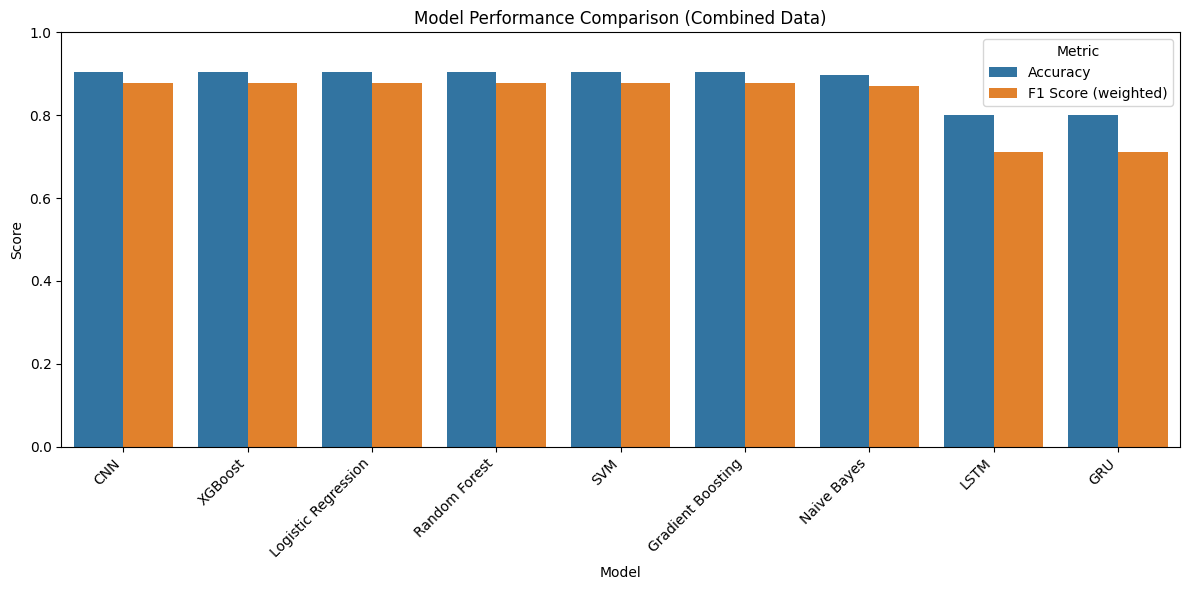

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming performance_df_combined is already created and contains the model performance metrics

# Melt the DataFrame to long format for easier plotting
performance_melted_combined = performance_df_combined.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Create a bar plot to visualize the performance
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=performance_melted_combined)
plt.title('Model Performance Comparison (Combined Data)')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for scores
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [99]:
# Create a dictionary to store the evaluation metrics for each model on the combined dataset
model_performance_combined = {
    'Model': ['Naive Bayes', 'Logistic Regression', 'SVM', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LSTM', 'GRU', 'CNN'],
    'Accuracy': [accuracy_nb_combined, accuracy_lr_combined, accuracy_svm_combined, accuracy_rf_combined, accuracy_gb_combined, accuracy_xgb_combined, accuracy_lstm_combined, accuracy_gru_combined, accuracy_cnn_combined],
    'F1 Score (weighted)': [f1_nb_combined, f1_lr_combined, f1_svm_combined, f1_rf_combined, f1_gb_combined, f1_xgb_combined, f1_lstm_combined, f1_gru_combined, f1_cnn_combined] # Using weighted F1 for multiclass
}

# Create a pandas DataFrame from the dictionary
performance_df_combined = pd.DataFrame(model_performance_combined)

# Sort the table by Accuracy for better comparison (optional)
performance_df_combined = performance_df_combined.sort_values(by='Accuracy', ascending=False)

# Display the comparison table
print("Model Performance Comparison (Combined Data):")
display(performance_df_combined)

Model Performance Comparison (Combined Data):


,Model,Accuracy,F1 Score (weighted)
8,CNN,0.903755,0.878072
5,XGBoost,0.903539,0.877870
1,Logistic Regression,0.903539,0.877836
3,Random Forest,0.903539,0.877963
2,SVM,0.903323,0.877727
4,Gradient Boosting,0.903107,0.877526
0,Naive Bayes,0.895986,0.870092
6,LSTM,0.800604,0.711947
7,GRU,0.800604,0.711947


/tmp/ipython-input-614561402.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=performance_df_combined.sort_values(by='Accuracy', ascending=False), palette='viridis')


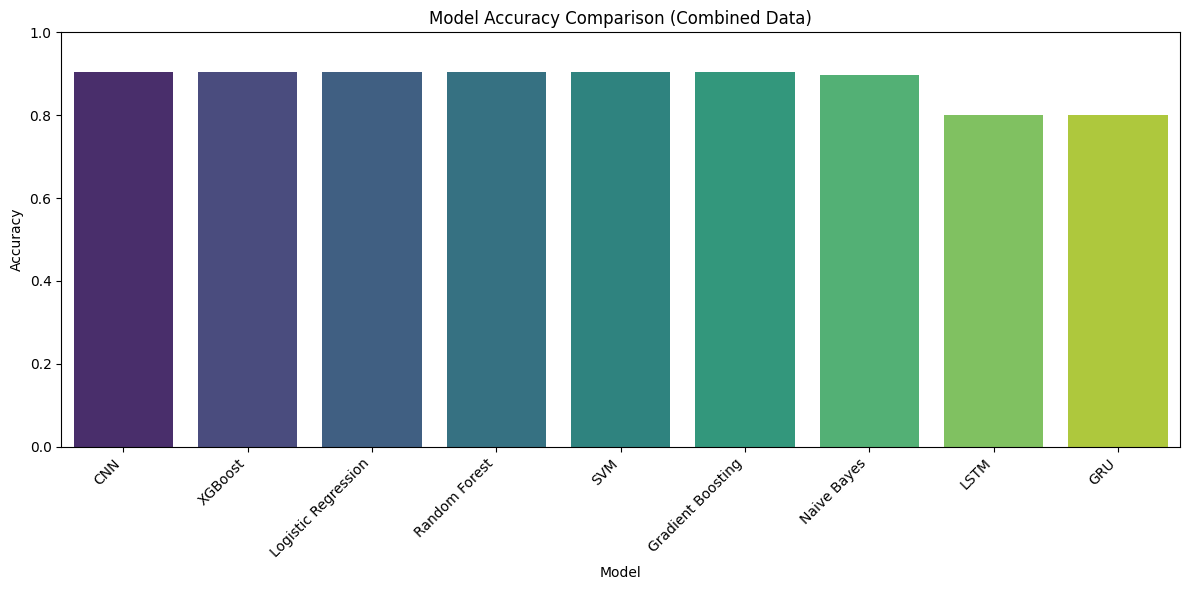

/tmp/ipython-input-614561402.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1 Score (weighted)', data=performance_df_combined.sort_values(by='F1 Score (weighted)', ascending=False), palette='viridis') # Use the correct column name for weighted F1


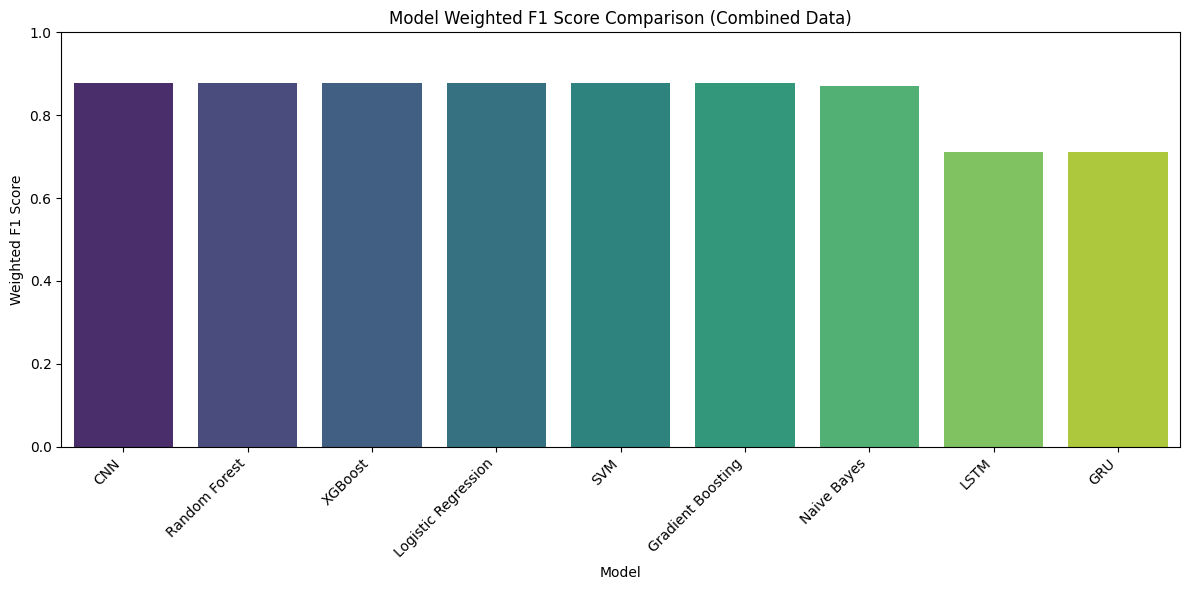

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming performance_df_combined is already created and contains the model performance metrics

# Plot Accuracy separately
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=performance_df_combined.sort_values(by='Accuracy', ascending=False), palette='viridis')
plt.title('Model Accuracy Comparison (Combined Data)')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Plot F1 Score separately
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='F1 Score (weighted)', data=performance_df_combined.sort_values(by='F1 Score (weighted)', ascending=False), palette='viridis') # Use the correct column name for weighted F1
plt.title('Model Weighted F1 Score Comparison (Combined Data)')
plt.xlabel('Model')
plt.ylabel('Weighted F1 Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

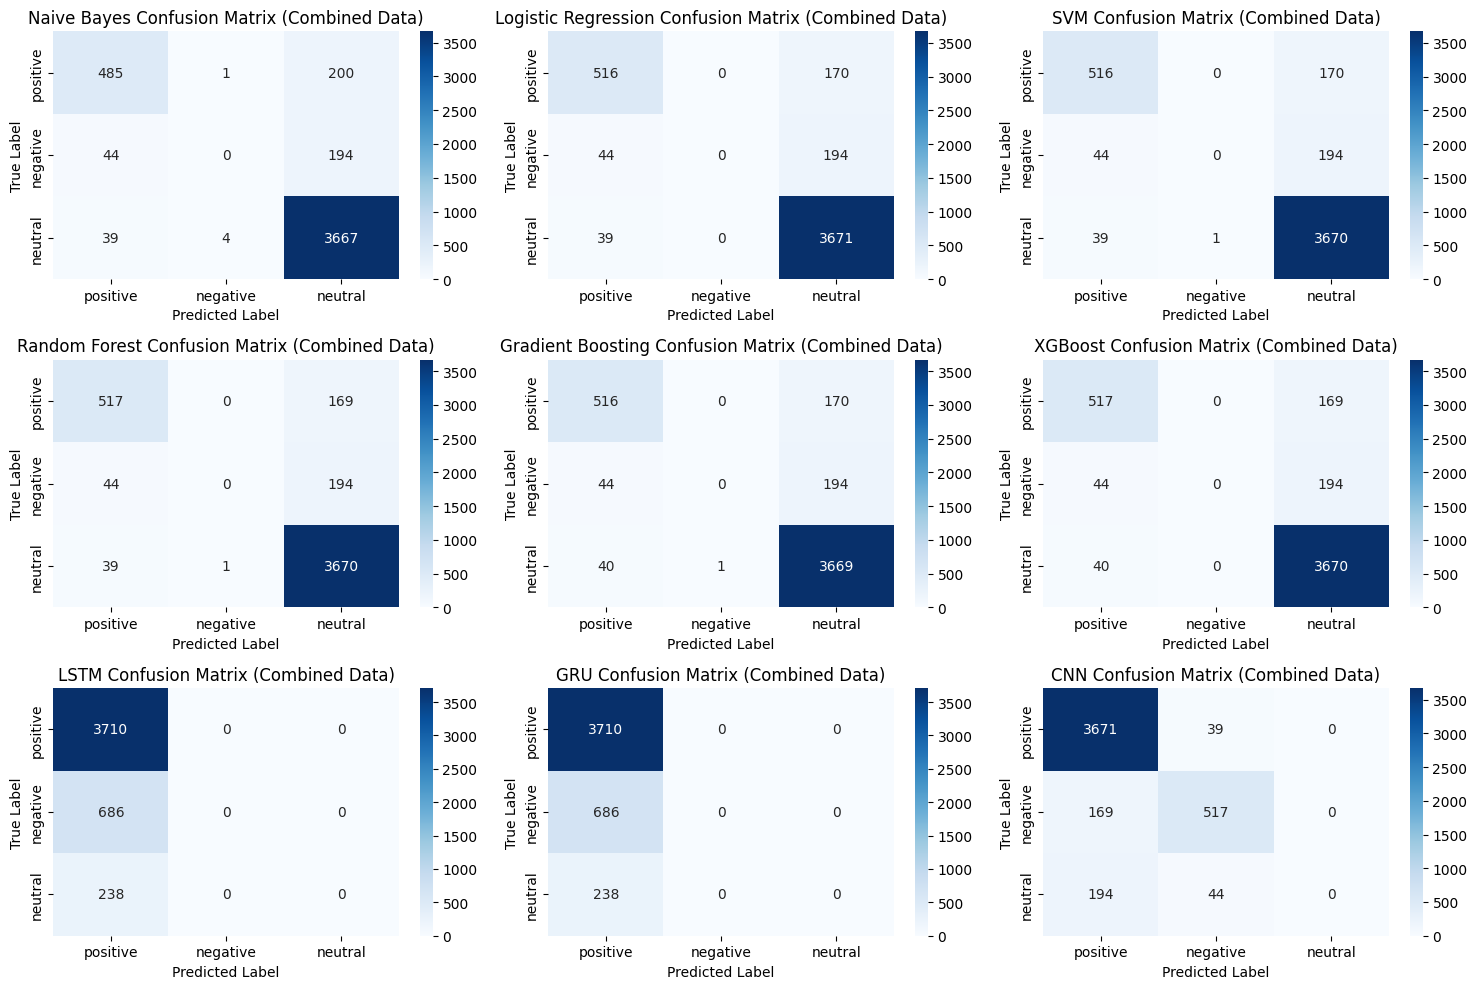

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the confusion matrices calculated and stored for each model on the combined dataset:
# confusion_nb_combined, confusion_lr_combined, confusion_svm_combined, confusion_rf_combined,
# confusion_gb_combined, confusion_xgb_combined, confusion_lstm_combined, confusion_gru_combined,
# confusion_cnn_combined

models_combined = ['Naive Bayes', 'Logistic Regression', 'SVM', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LSTM', 'GRU', 'CNN']
confusion_matrices_combined = [
    confusion_nb_combined, confusion_lr_combined, confusion_svm_combined,
    confusion_rf_combined, confusion_gb_combined, confusion_xgb_combined,
    confusion_lstm_combined, confusion_gru_combined, confusion_cnn_combined
]

# Define class labels based on the unique labels in the combined dataset
# Assuming the order corresponds to the numerical mapping used for deep learning models
class_labels_combined = unique_labels # unique_labels was defined when preparing data for deep learning

plt.figure(figsize=(15, 10))

for i, (model_name, confusion_matrix) in enumerate(zip(models_combined, confusion_matrices_combined)):
    plt.subplot(3, 3, i + 1) # Adjust the grid size based on the number of models
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels_combined, yticklabels=class_labels_combined)
    plt.title(f'{model_name} Confusion Matrix (Combined Data)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.tight_layout()
plt.show()

Model Performance Comparison Across Datasets:


,Model,Accuracy,F1 Score (weighted),Dataset
0,Naive Bayes,0.767355,0.765152,First Dataset
2,SVM,0.755159,0.754468,First Dataset
1,Logistic Regression,0.749531,0.747398,First Dataset
3,Random Forest,0.722326,0.707510,First Dataset
8,CNN,0.719512,0.711668,First Dataset
5,XGBoost,0.695122,0.670051,First Dataset
4,Gradient Boosting,0.638837,0.681555,First Dataset
6,LSTM,0.500000,0.666667,First Dataset
7,GRU,0.500000,0.666667,First Dataset
8,CNN,0.903755,0.878072,Combined Dataset


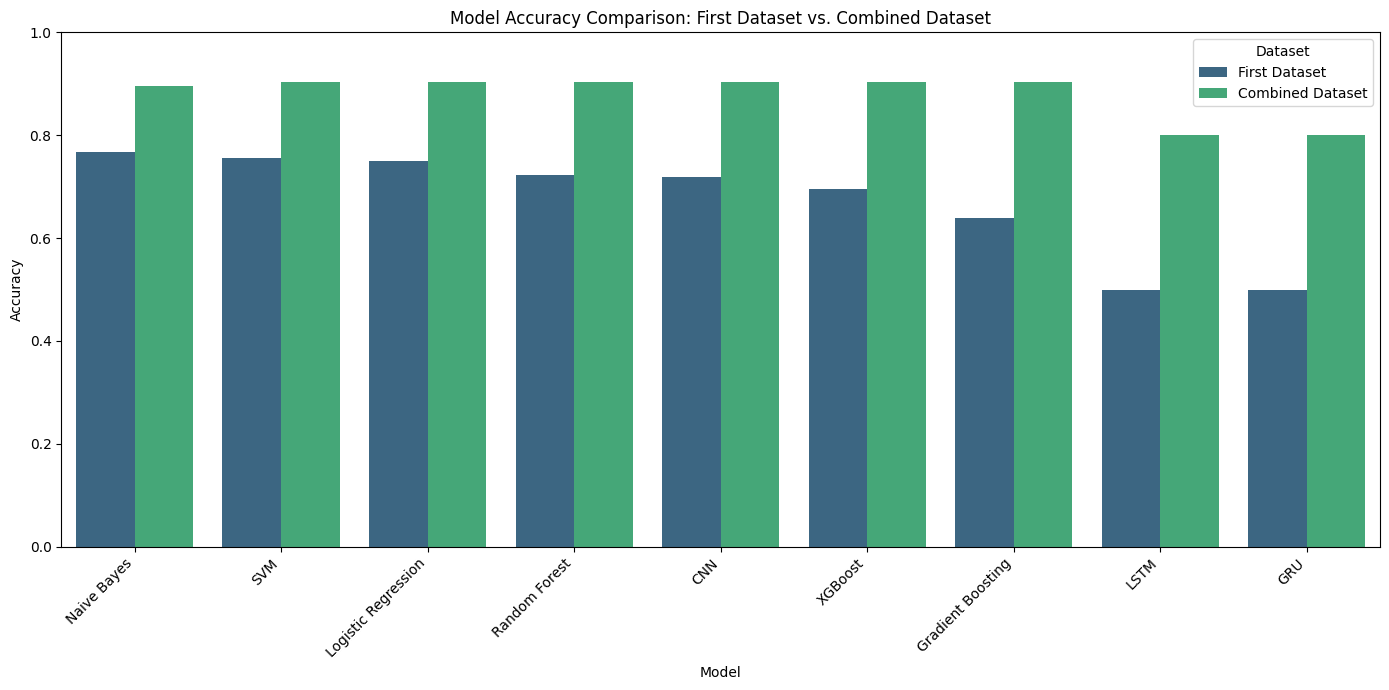

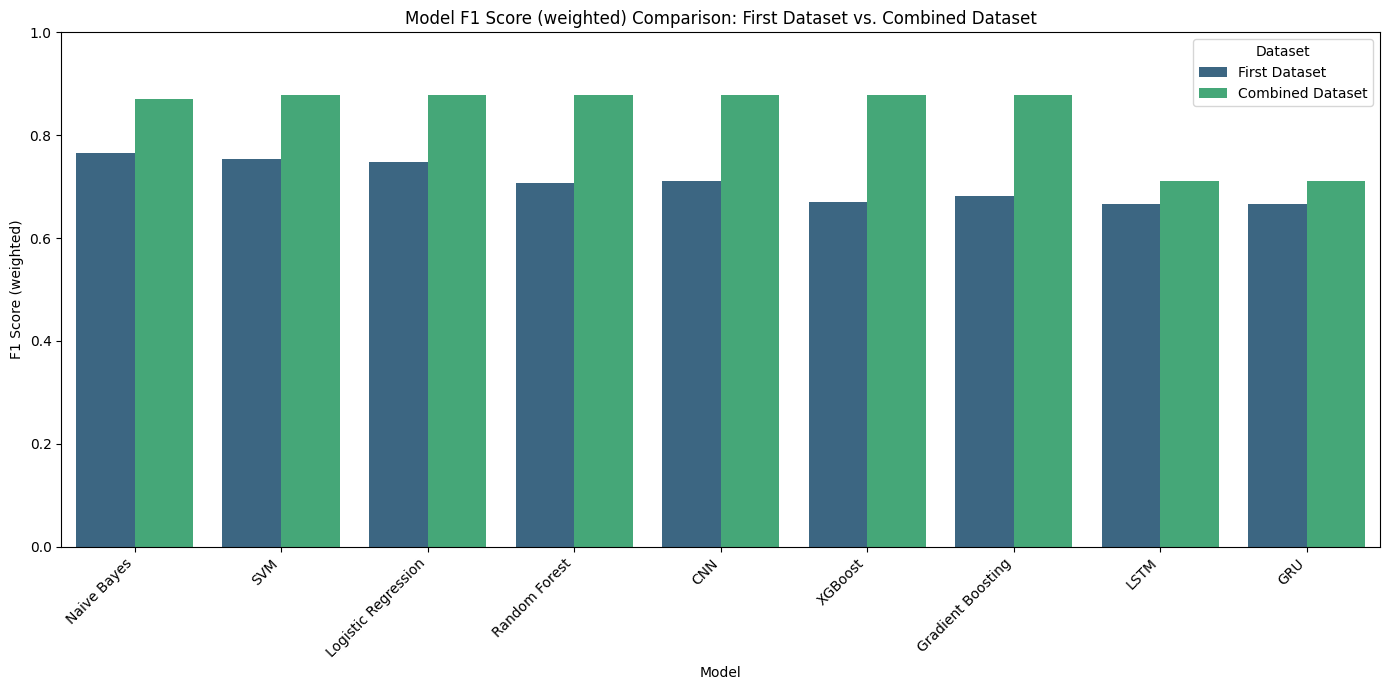

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming performance_df (for the first dataset) and performance_df_combined (for the second dataset) are available

# Add a 'Dataset' column to each DataFrame to distinguish them
performance_df['Dataset'] = 'First Dataset'
performance_df_combined['Dataset'] = 'Combined Dataset'

# Rename the 'F1 Score' column in performance_df to match 'F1 Score (weighted)' in performance_df_combined for consistency
performance_df = performance_df.rename(columns={'F1 Score': 'F1 Score (weighted)'})


# Combine the two DataFrames
combined_performance_df = pd.concat([performance_df, performance_df_combined])

# Display the combined table
print("Model Performance Comparison Across Datasets:")
display(combined_performance_df)

# Melt the combined DataFrame for easier plotting
combined_performance_melted = combined_performance_df.melt(id_vars=['Model', 'Dataset'], var_name='Metric', value_name='Score')

# Create separate bar plots for each metric to compare performance across datasets
metrics_to_plot = ['Accuracy', 'F1 Score (weighted)']

for metric in metrics_to_plot:
    plt.figure(figsize=(14, 7))
    sns.barplot(x='Model', y='Score', hue='Dataset', data=combined_performance_melted[combined_performance_melted['Metric'] == metric], palette='viridis')
    plt.title(f'Model {metric} Comparison: First Dataset vs. Combined Dataset')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

In [105]:
# Assuming combined_performance_df is already created and contains the combined model performance data
# Display the combined table
print("Model Performance Comparison Across Datasets:")
display(combined_performance_df)

Model Performance Comparison Across Datasets:


,Model,Accuracy,F1 Score (weighted),Dataset
0,Naive Bayes,0.767355,0.765152,First Dataset
2,SVM,0.755159,0.754468,First Dataset
1,Logistic Regression,0.749531,0.747398,First Dataset
3,Random Forest,0.722326,0.707510,First Dataset
8,CNN,0.719512,0.711668,First Dataset
5,XGBoost,0.695122,0.670051,First Dataset
4,Gradient Boosting,0.638837,0.681555,First Dataset
6,LSTM,0.500000,0.666667,First Dataset
7,GRU,0.500000,0.666667,First Dataset
8,CNN,0.903755,0.878072,Combined Dataset


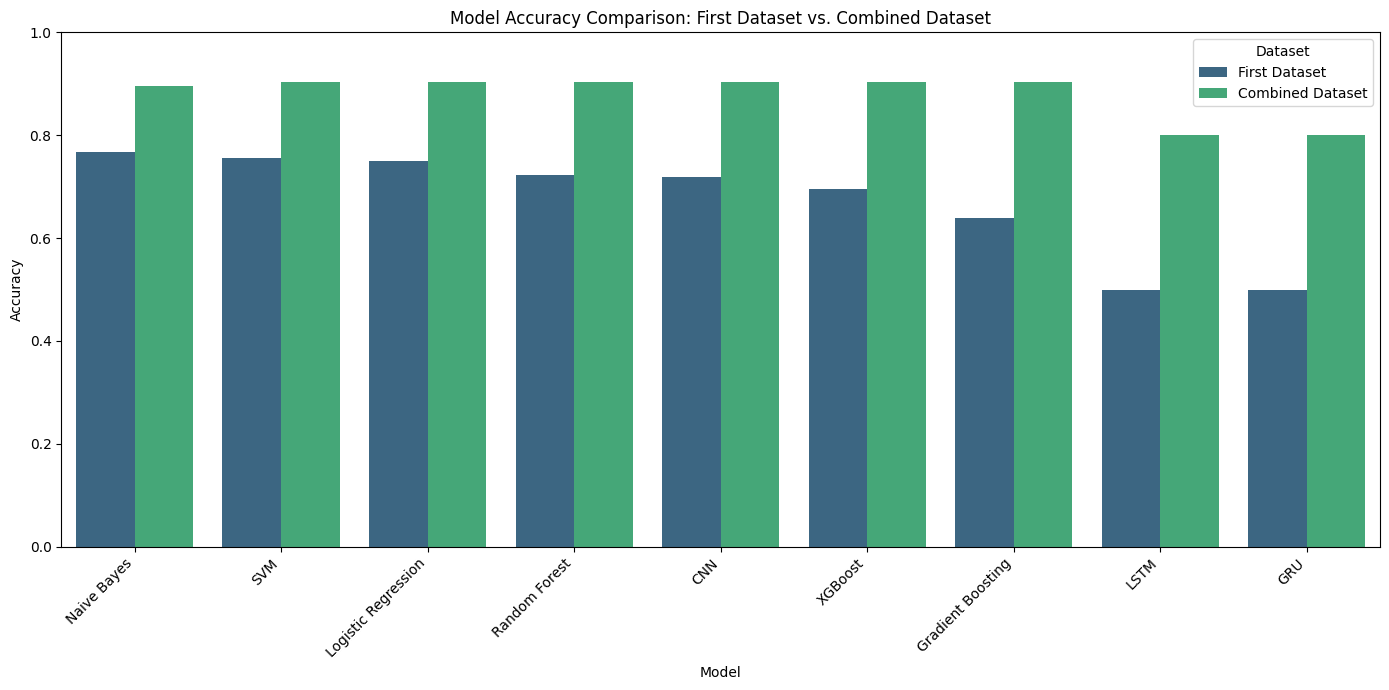

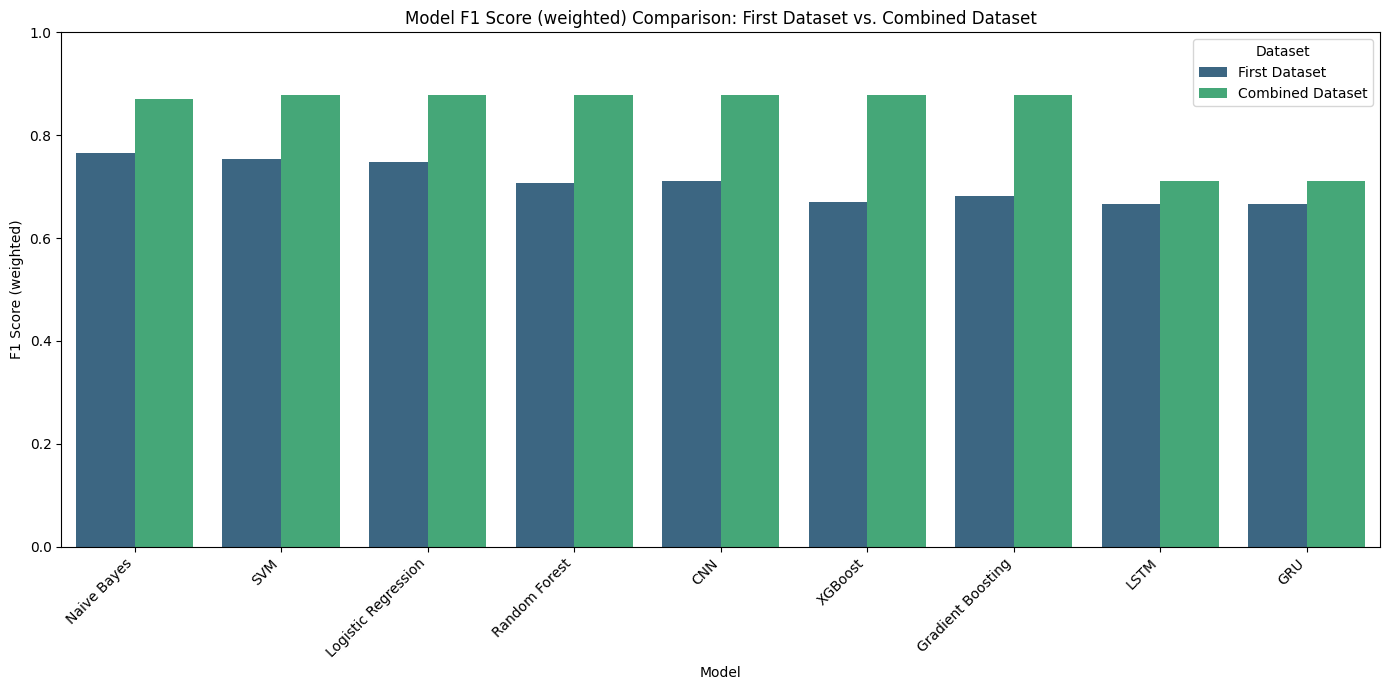

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming combined_performance_df is already created and contains the combined model performance data

# Melt the combined DataFrame for easier plotting
combined_performance_melted = combined_performance_df.melt(id_vars=['Model', 'Dataset'], var_name='Metric', value_name='Score')

# Create separate bar plots for each metric to compare performance across datasets
metrics_to_plot = ['Accuracy', 'F1 Score (weighted)']

for metric in metrics_to_plot:
    plt.figure(figsize=(14, 7))
    sns.barplot(x='Model', y='Score', hue='Dataset', data=combined_performance_melted[combined_performance_melted['Metric'] == metric], palette='viridis')
    plt.title(f'Model {metric} Comparison: First Dataset vs. Combined Dataset')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()